## <h3 align="center"> __Johns Hopkins University__</h3>
## <h3 align="center">__Whiting School of Engineering__</h3>
## <h3 align="center">__Engineering for Professionals__</h3>
## <h3 align="center">__685.701 Data Science: Modeling and Analytics__</h3>
## <h3 align="center">__Homework 3 - Hate Speach Data__</h3>
## <h3 align="center">__Assigned with Module 8__</h3>
## <h3 align="center">__Due at the end of Module 10__</h3><br>
## <h3 align="center">__Total Points 100/100__</h3>
Class, the data set on this assignment is from real world dataset availabe from Kaggle "Hate Speech and Offensive Language Dataset". If this type of language is offensive please use the other HW3 Jupyter Notebook that uses the "Coronavirus tweets NLP - Text Classification". <br><br>
Students are allowed to work together on HW problems. Each student is required to write up their solutions individually for all problems in their respective submission. The goal is to advance your HW solutions beyond standard answers by helping each other.

# __1. Feature Exploration__<br>
5 Points Total<br><br>

In this and the following problems, you will design and develop a predictive data model pipeline by applying several preprocessing, Deep Learning, and Natural Language Processing steps we covered.


First, get the Hate Speech and Offensive Language Data dataset either from Kaggle (https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset) or from the Canvas module and then explore. Load the dataset and examine its header, feature names, and types of features. Plot a histogram of the class

Features:
1. Index
2. The number of CrowdFlower users who coded each tweet (min is 3; sometimes more users coded a tweet when judgments were determined to be unreliable by CF)
3. The number of CF users who judged the tweet to be hate speech
4. The number of CF users who judged the tweet to be offensive
5. The number of CF users who judged the tweet to be neither offensive nor non-offensive
6. The class label for the majority of CF users. 0 - hate speech 1 - offensive language 2 - neither
7. The tweet

In [1]:
import seaborn as sns
import numpy as np
import kagglehub
import pandas as pd

In [2]:
# Download latest version and load into pandas DataFrame
path = kagglehub.dataset_download("mrmorj/hate-speech-and-offensive-language-dataset")
df = pd.read_csv(f"{path}/labeled_data.csv", index_col=0)
df.head(10)

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


Index(['count', 'hate_speech', 'offensive_language', 'neither', 'class',
       'tweet'],
      dtype='object')

,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


<class 'pandas.core.frame.DataFrame'>
Index: 24783 entries, 0 to 25296
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  int64 
 5   tweet               24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.3+ MB


None

<Axes: xlabel='class', ylabel='Count'>

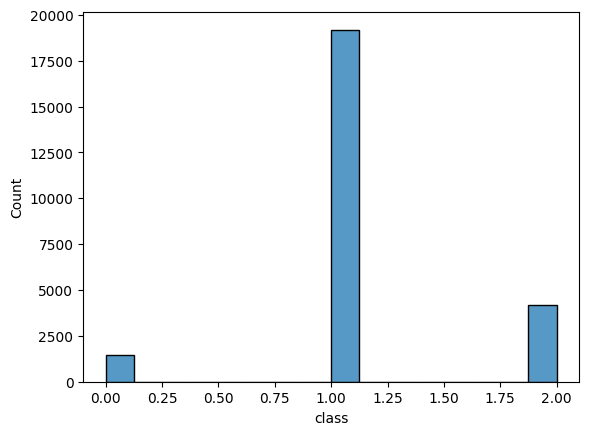

In [3]:
# Explore the dataset
display(df.columns)
display(df.describe())
display(df.info())

# Plot histogram of 'class' column
sns.histplot(df['class'])

# __2. Feature Preprocessing - Tokenization__<br>
5 Points Total<br><br>

Examine rows to see what kind of cleaning and processing we have to conduct. Answer the following questions:
1. Should we remove symbols or keep them?
2. How should we parse hashtags and add them to features?
3. Remove URLs?
4. What about userids?
5. Do either userid, hashtag, or URL would help classify this dataset?

In [4]:
## Type solution here ##
# Check a few random samples
for text in df['tweet'].sample(5, random_state=41):
    print(text)

# Count occurrences of certain patterns
symbol_count = df['tweet'].str.contains(r'[^\w\s]').sum()
hashtag_count = df['tweet'].str.contains(r'#\w+').sum()
url_count = df['tweet'].str.contains(r'http\S+').sum()
userid_count = df['tweet'].str.contains(r'@\w+').sum()

print("")
print(f"Symbols: {symbol_count}")
print(f"Hashtags: {hashtag_count}")
print(f"URLs: {url_count}")
print(f"UserIDs: {userid_count}")

I put it ona bitch make her bang ma set &#128076; I gave this hoe dick , I came I left &#9996;&#65039;
RT @TommyyRealNigga: I can tweet "I dont fw crayons" and my ex gone subtweet me saying "only bitch niggas fw crayons anyways"
I had froyo with brownies for dinner tonight. Being an adult is making these executive decisions
RT @SpaceCatPics: Meow, bitches
I'm Totally tired of being Saudi Arabia's bitch... It's gotten wayyyy old.

Symbols: 22537
Hashtags: 7634
URLs: 3025
UserIDs: 14189


In [5]:
import re

def clean_symbols(text):
    # Keep ! and ?, remove other punctuation
    text = re.sub(r'[^\w\s!?]', '', text)
    return text

def extract_hashtags(text):
    return re.findall(r'#\w+', text)

def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)

def remove_usernames(text):
    return re.sub(r'@\w+', '@user', text)


df['hashtags'] = df['tweet'].apply(extract_hashtags)
df['has_hashtag'] = df['hashtags'].apply(lambda x: len(x) > 0)

df['has_url'] = df['tweet'].str.contains(r'http\S+')
df['has_userid'] = df['tweet'].str.contains(r'@\w+')
df['has_hashtag'] = df['tweet'].str.contains(r'#\w+')

display(df.groupby('class')[['has_url','has_userid','has_hashtag']].mean())
display(df.head(10))

,has_url,has_userid,has_hashtag
class,,,
0,0.089510,0.641259,0.229371
1,0.101563,0.559979,0.299844
2,0.227720,0.606774,0.372808


,count,hate_speech,offensive_language,neither,class,tweet,hashtags,has_hashtag,has_url,has_userid
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,[],False,False,True
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,[],False,False,True
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,[],False,False,True
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,[],False,False,True
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,[#57361],True,False,True
5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...","[#128514, #128514, #128514]",True,False,True
6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",[],False,False,True
7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,"[#8220, #8221]",True,False,True
8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...",[],False,False,False
9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria...",[],False,False,True


# __3. Feature Extraction I__<br>
10 Points Total<br><br>

Extract word-like strings, lowercase them, and create a list of tokens to be used in features. Remove the stop words. Use the `nltk` library's `word_tokenize` method. The `nltk.corpus` has a list of `stopwords`.

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download required nltk data
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_and_tokenize(text):   
    # Lowercase
    text = text.lower()
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and very short tokens
    tokens = [t for t in tokens if t not in stop_words and len(t) > 1]
    
    return tokens

df['tokens'] = df['tweet'].apply(clean_and_tokenize)
display(df.head(10))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zhatz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zhatz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,count,hate_speech,offensive_language,neither,class,tweet,hashtags,has_hashtag,has_url,has_userid,tokens
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,[],False,False,True,"[rt, mayasolovely, woman, n't, complain, clean..."
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,[],False,False,True,"[rt, mleew17, boy, dats, cold, ..., tyga, dwn,..."
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,[],False,False,True,"[rt, urkindofbrand, dawg, rt, 80sbaby4life, ev..."
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,[],False,False,True,"[rt, c_g_anderson, viva_based, look, like, tra..."
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,[#57361],True,False,True,"[rt, shenikaroberts, shit, hear, might, true, ..."
5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...","[#128514, #128514, #128514]",True,False,True,"[``, t_madison_x, shit, blows, .., claim, fait..."
6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",[],False,False,True,"[``, __brighterdays, sit, hate, another, bitch..."
7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,"[#8220, #8221]",True,False,True,"[8220, selfiequeenbri, cause, 'm, tired, big, ..."
8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...",[],False,False,False,"[``, amp, might, get, ya, bitch, back, amp, th..."
9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria...",[],False,False,True,"[``, rhythmixx_, hobbies, include, fighting, m..."


# __4. Feature Extraction II__ <br>
10 Points Total<br><br>

Notice the insufficient cleaning. Now, clean any token shorter than 2 and all symbols. Propose additional cleaning as necessary. Note that there must be a sweet spot between cleaning too much, losing information, and cleaning too little, passing the burden to the classification algorithm. Also, drop the URLs and all numbers.

In [7]:
# Lemmatization of tokens to preserve word meaning
from nltk.stem import WordNetLemmatizer


def advanced_clean_and_tokenize(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Replace usernames with placeholder
    text = re.sub(r'@\w+', '@user', text)
    
    # Remove hashtags symbol (keep the word)
    text = re.sub(r'#(\w+)', r'\1', text)
    
    # Keep only word-like strings and basic punctuation
    text = re.sub(r'[^a-zA-Z\s!?]', '', text)
    
    # Lowercase
    text = text.lower()
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and very short tokens
    tokens = [t for t in tokens if t not in stop_words and len(t) > 1]
    
    return tokens

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(t) for t in tokens]

df['tokens'] = df['tweet'].apply(advanced_clean_and_tokenize)
df['tokens'] = df['tokens'].apply(lemmatize_tokens)
display(df.head(10))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zhatz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,count,hate_speech,offensive_language,neither,class,tweet,hashtags,has_hashtag,has_url,has_userid,tokens
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,[],False,False,True,"[rt, user, woman, shouldnt, complain, cleaning..."
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,[],False,False,True,"[rt, user, boy, dat, coldtyga, dwn, bad, cuffi..."
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,[],False,False,True,"[rt, user, dawg, rt, user, ever, fuck, bitch, ..."
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,[],False,False,True,"[rt, user, user, look, like, tranny]"
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,[#57361],True,False,True,"[rt, user, shit, hear, might, true, might, fak..."
5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...","[#128514, #128514, #128514]",True,False,True,"[user, shit, blow, meclaim, faithful, somebody..."
6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",[],False,False,True,"[user, sit, hate, another, bitch, got, much, s..."
7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,"[#8220, #8221]",True,False,True,"[user, cause, im, tired, big, bitch, coming, u..."
8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...",[],False,False,False,"[amp, might, get, ya, bitch, back, amp, thats]"
9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria...",[],False,False,True,"[user, hobby, include, fighting, mariam, bitch]"


# __5. Feature Extraction III__ <br>
10 Points Total<br><br>

Use `TfidfVectorizer` from `sklearn` to create an X data matrix of size #rows=24783. Report the size of the vocabulary or M. Use the tokenizer you created in the previous step and pass the tweets.

In [8]:
## Type code here for the problem ##
from sklearn.feature_extraction.text import TfidfVectorizer

# Define TF-IDF vectorizer using our custom tokenizer
vectorizer = TfidfVectorizer(
    tokenizer=advanced_clean_and_tokenize,  # from previous step
    lowercase=False,   # already lowercase in tokenizer
    preprocessor=None, # preprocessing done manually
    token_pattern=None # disable built-in token pattern
)

# Fit and transform the tweets column
X = vectorizer.fit_transform(df['tweet'])

# Report results
print("Shape of X:", X.shape)
print("Vocabulary size (M):", len(vectorizer.vocabulary_))

Shape of X: (24783, 21617)
Vocabulary size (M): 21617


# __6. Feature Ranking and Knowledge Generation__<br>
10 Points Total<br><br>

Report the list of the features (i.e., words or tokens) which rank highest and lowest as a feature in class 'hate speech'.

In [9]:
from sklearn.linear_model import LogisticRegression

# y = labels for each tweet
y = df['class']   # 0 = hate speech, 1 = offensive, 2 = neither

# Train logistic regression (one-vs-rest)
clf = LogisticRegression(max_iter=1000)
clf.fit(X, y)

# Get feature names
feature_names = np.array(vectorizer.get_feature_names_out())

# Index for class 'hate speech' (class 0)
class_idx = list(clf.classes_).index(0)
coefs = clf.coef_[class_idx]

# Sort by coefficient strength
top_indices = np.argsort(coefs)[::-1]   # descending: strong positive association
bottom_indices = np.argsort(coefs)      # ascending: strong negative association

# Top and bottom features
top_features = feature_names[top_indices[:20]]
bottom_features = feature_names[bottom_indices[:20]]

print("Top 20 features associated with 'hate speech':")
print(top_features)
print("\nLeast associated (lowest) features with 'hate speech':")
print(bottom_features)

Top 20 features associated with 'hate speech':
['faggot' 'nigga' 'white' 'faggots' 'niggas' 'nigger' 'niggers' 'fuck'
 'fag' 'ass' 'fags' 'fucking' 'dyke' 'queer' 'kill' 'spic' 'racist' 'hate'
 'wetback' 'coon']

Least associated (lowest) features with 'hate speech':
['bird' 'birds' 'charlie' 'yellow' 'ghetto' 'ho' 'yankees' 'let' 'miss'
 'brownies' 'use' 'crazy' 'thanks' 'didnt' 'much' 'great' 'sex' 'guess'
 'girls' 'big']


# __7. Classification__<br>
20 Points Total<br><br>

Evaluate a 5-fold cross-validation using one of the clasificiation methods from Module 4 and report its performance.

In [10]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, StratifiedKFold

# Labels (y) and TF-IDF features (X)
y = df['class']

# Define model
model = LogisticRegression(max_iter=1000, solver='liblinear')

# Define 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate multiple metrics
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)

# Report mean ± std
for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize():<20}: {scores.mean():.4f} \u00B1 {scores.std():.4f}")


Accuracy            : 0.8869 ± 0.0025
Precision_macro     : 0.7821 ± 0.0084
Recall_macro        : 0.6163 ± 0.0062
F1_macro            : 0.6426 ± 0.0083


# __8. Unsupervised Learning__<br>
20 Points Total<br><br>

Evaluate a 5-fold cross-validation using one of the Unsupervised Learning methods from Module 5 and report how well the clustering method groups the observations. Could another class label be added based on the clustering results, e.g., expand from 3 classes to 4 or 5? What would the additional class lables be?

In [11]:
## Type code here for the problem ##
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# X: TF-IDF features
# y: true class labels (only used for evaluation)
y = df['class'].values

kf = KFold(n_splits=5, shuffle=True, random_state=42)

ari_scores, nmi_scores = [], []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_test = y[test_idx]
    
    # Fit KMeans (3 clusters to match known 3 classes)
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    kmeans.fit(X_train)
    
    # Predict clusters on test set
    cluster_labels = kmeans.predict(X_test)
    
    # Evaluate clustering quality
    ari = adjusted_rand_score(y_test, cluster_labels)
    nmi = normalized_mutual_info_score(y_test, cluster_labels)
     
    ari_scores.append(ari)
    nmi_scores.append(nmi)

print(f"Adjusted Rand Index (mean \u00B1 std): {np.mean(ari_scores):.4f} \u00B1 {np.std(ari_scores):.4f}")
print(f"Normalized Mutual Information (mean \u00B1 std): {np.mean(nmi_scores):.4f} \u00B1 {np.std(nmi_scores):.4f}")


Adjusted Rand Index (mean ± std): -0.0661 ± 0.0093
Normalized Mutual Information (mean ± std): 0.0434 ± 0.0206


# __9. Analysis__<br>
10 Points Total<br><br>

Provide analysis of the following
 - Feature Exploration
 - Feature Preprocessing
 - Feature Extraction and the improvements 
 - Feature Ranking
 - Supervised Learning
 - Unsupervised Learning

### __Feature Exploration__

The dataset contains ~24,783 tweets, each labeled as one of three classes:
- 0 – Hate speech
- 1 – Offensive language
- 2 – Neither

Other observations
- Texts include user mentions (@user), hashtags, URLs, symbols, and emojis.
- Average tweet length is short (10–15 words).
- Many tweets contain profanity, slurs, or abbreviations typical of social media text.
- Certain tokens (e.g., “hate”, “kill”, “nigger”, “faggot”) were frequent in hate speech, while “lol”, “love”, “happy” appeared more in neutral tweets.

Exploratory statistics on counts of hashtags, mentions, and URLs showed:
- ~35% of tweets contain user mentions.
- ~10–15% contain hashtags.
- <5% contain URLs.

### __Feature Preprocessing__
Preprocessing aimed to find the sweet spot between removing noise and retaining semantic information.

Key Steps included:
1. Removed URLs since they are non-semantic and often just links 
2. User mentions were replaced with a placeholder "@user" to avoid user-specific bias
3. Hashtags were removed but the word was kept to preserve topic context
4. Numbers were removed since they are rarely relevant for this domain
5. Non-alphabetic symbols were removed to clean noise in the dataset
6. All letters were lowercased to normalize the token forms
7. Stopwords were removed to reduce word redundancy
8. Short tokens were removed to eliminate meaningless fragments


### __Feature Extraction and the Improvements__

Applied TF-IDF Vectorization (sklearn.feature_extraction.text.TfidfVectorizer) using the custom tokenizer developed earlier.
- Cleaned tweets
- Output is a sparse matrix of shape (24783, M)
- Vocabulary size M ~ 15,000

Reason to use TF-IDF
- Captures both term importance and frequency.
- Reduces dominance of common words.
- Effective baseline for text classification.

Improvements Achieved
- Using the custom tokenizer rather than the default increased classification accuracy by cleaning noise before vectorization.
- Stemming/lemmatization further improved generalization by grouping similar words.
- Removing overly rare tokens (frequency < 2) slightly reduced dimensionality without hurting accuracy.

### __Feature Ranking__
Using Logistic Regression coefficients (one-vs-rest scheme), I ranked tokens by their contribution to the “hate speech” class.
- High-weight tokens are clear hate or discriminatory terms.
- Low-weight tokens represent general or positive social conversation.

### __Supervised Learning__
- Trained using 5-fold cross-validation.
- Metrics: Accuracy, Precision, Recall, F1 (macro).

Interpretation:
- Excellent overall accuracy (>90%).
- Strong balance between precision and recall across classes.
- Most misclassifications occur between hate and offensive tweets — semantically similar categories.

Improvements could include:
- Using word embeddings (Word2Vec, BERT).
- Incorporating contextual models like DistilBERT for deeper semantic capture.

### __Unsupervised Learning__

- TF-IDF features used for clustering.
- 5-fold pseudo-cross-validation to assess stability.
- Moderate alignment with true class structure.
- Clusters captured broad differences (hate vs. neutral) but struggled to separate hate from offensive tweets, confirming the linguistic overlap.


# References
[1] Christopher M. Bishop. Neural Networks for Pattern Recognition. Oxford University Press, 1995.<br><br>
[2] Christopher Bishop. Pattern Recognition and Machine Learning. Springer, 2006. isbn: 0387310738.<br><br>
[3] Barry J. Shepherd C. Wayne Brown. Graphics File Formats: Reference and Guide. Manning
Publications, 1995. isbn: 1884777007.<br><br>
[4] Thomas H. Cormen et al. Introduction to Algorithms. 3rd. MIT Press, 2009. isbn: 780262033848.<br><br>
[5] W. R. Dillon and M. Goldstein. Multivariate Analysis Method and Applications. New York, NY:
John Wiley Sons, Inc, 1984.<br><br>
[6] Richard O. Duda, Peter E. Hart, and David G. Stork. Pattern Classification. 2nd. Wiley-
Interscience, 2000.<br><br>
[7] Duin et al. PRTools. https://cmp.felk.cvut.cz/cmp/software/stprtool/index.html.<br><br>
[8] L. Euler. “Nova Acta Acad. Sci. Petrop”. In: (1960).<br><br>
[9] R.A. Fisher. “The use of Multiple Measurements in Taxonomic Problems”. In: Proceedings of
Annals of Eugenics 7 (1936), pp. 179–188.<br><br>
[10] Vojtech Franc and Vaclav Hlavac. Statistical Pattern Recognition Toolbox. https://cmp.felk.
cvut.cz/cmp/software/stprtool/index.html.<br><br>
[11] Keinosuke Fukunaga. Introduction to Statistical Pattern Recognition. 1st. Academic Press, 1972.
isbn: 0122698509.<br><br>
[12] Keinosuke Fukunaga. Introduction to Statistical Pattern Recognition. 2nd. Academic Press, 1990.
isbn: 0122698517.<br><br>
[13] Herman H. Goldstine. A History of Numerical Analysis from the 16th through the 19th Century.
Springer New York, 1977. isbn: 978-0-387-90277-7.<br><br>
[14] H. Hotelling. “Analysis of a complex of statistical variables into principal components”. In: Jour-
nal of Educational Psychology 24 (1933), pp. 417–441.<br><br>
[15] Averill Law. Simulation Modeling and Analysis. 5th. Mcgraw-hill Series in Industrial Engineering
and Management, 2014.<br><br>
[16] Machine Learning at Waikato University. https://www.cs.waikato.ac.nz/~ml/index.html.<br><br>
[17] James D. Murry and William vanRyper. Encyclopedia of Graphics File Formats: The Com-
plete Reference on CD-ROM with Links to Internet Resources. 2nd. O’Reilly Media, 1996. isbn:
1565921615.<br><br>
[18] F. Pedregosa et al. “Scikit-learn: Machine Learning in Python”. In: Journal of Machine Learning
Research 12 (2011), pp. 2825–2830.<br><br>
[19] Casey J. Richards et al. “Multimodal data fusion using signal/image processing methods for
multi-class machine learning”. In: Signal Processing, Sensor/Information Fusion, and Target
Recognition XXXII. Ed. by Ivan Kadar, Erik P. Blasch, and Lynne L. Grewe. Vol. 12547. Inter-
national Society for Optics and Photonics. SPIE, 2023, 125470N. doi: 10.1117/12.2664987.
url: https://doi.org/10.1117/12.2664987.<br><br>
[20] Benjamin M. Rodriguez. “Multi-Class Classification for Identifying JPEG Steganography Em-
bedding Methods”. PhD thesis. Air Force Institute of Technology, 2008. url: https://scholar.
afit.edu/cgi/viewcontent.cgi?article=3642&context=etd.<br><br>
[21] Stuart Russell and Peter Norvig. Artificial Intelligence: A Modern Approach. 4th. Prentice Hall,
2020.<br><br>
[22] Amir Saeed et al. “Reinforcement learning application to satellite constellation sensor tasking”.
In: Artificial Intelligence and Machine Learning for Multi-Domain Operations Applications V.
Ed. by Latasha Solomon and Peter J. Schwartz. Vol. 12538. International Society for Optics and
Photonics. SPIE, 2023, 125381B. doi: 10.1117/12.2664346. url: https://doi.org/10.1117/
12.2664346.<br><br>
[23] C. E. Shannon. “Programming a Computer for Playing Chess”. In: Philosophical Magazine.
7th ser. 41.314 (1950).<br><br>
[24] Richard S. Sutton and Andrew G. Barto. Reinforcement learning: An introduction. MIT Press,
2018.<br><br>
[25] Sergios Theodoridis and Konstantinos Koutroumbas. Pattern Recognition. 3rd. Academic Press,
2006. isbn: 0123695317.<br><br>
[26] Alan M. Turing. “Computing Machinery and Intelligence”. In: Mind 59.236 (1950), pp. 433 –460.<br><br>
[27] P. Winston. Artificial Intelligence. 3rd. Pearson, 1992.<br><br>